## Task Overview

the dataset provided for the task is about items in the fashion industry each of these items have certain parameters that is used to predict the success_indicator.

1. historic.csv :
  
  This consists of historic data based on which we need to understnad what products flop or top based on various parameters such as color, main_promotion, stars, category.

2. prediction_input.csv :

  This csv files consits of the parameters and we need to predict the target variable whether the item will flop or top based on the historic data.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Understanding the Dataset:

This section largely focuses on understanding the dataset. The main idea is to see what are columns present and how they are affiliated with the target variable.

Based on the data we then define a plan.

In [73]:
df = pd.read_csv("historic.csv")

Columns : item_no,category,	main_promotion,	color,	stars,

Target value: success_indicator

In [69]:
df.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


The `info()` allows to check whether there are any missing values and what are the data types of each of the columns.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [142]:
df.isnull().value_counts()

category  main_promotion  color  stars  success_indicator
False     False           False  False  False                8000
dtype: int64

Drop item_no as it does not give any insights and is used for simply identification.

In [74]:
df.drop("item_no", axis=1, inplace=True)

Lets make use of the `groupby()` method to check how each of the parameters are related to the target varaible.

The main goal is to check which category, color or promotion works best and what needs more attention.

**Understanding Color**

In [96]:
color_top_counts = df[df['success_indicator'] == 'top'].groupby('color').size().reset_index(name='count')
color_flop_counts = df[df['success_indicator'] == 'flop'].groupby('color').size().reset_index(name='count')

In [135]:
merged_counts = pd.merge(color_flop_counts, color_top_counts, on='color', suffixes=('_flop', '_top'))
merged_counts['count_diff'] = merged_counts['count_top'] - merged_counts['count_flop']
merged_counts['count_total'] = merged_counts['count_top'] + merged_counts['count_flop']
merged_counts['percentage_diff'] = ((merged_counts['count_top'] - merged_counts['count_flop']) /(merged_counts['count_top'] + merged_counts['count_flop'])) * 100
merged_counts

,color,count_flop,count_top,count_diff,count_total,percentage_diff
0,Black,189,623,434,812,53.448276
1,Blue,332,912,580,1244,46.623794
2,Brown,179,406,227,585,38.803419
3,Green,217,511,294,728,40.384615
4,Multi-Color,708,735,27,1443,1.871102
5,Orange,190,402,212,592,35.810811
6,Pink,87,325,238,412,57.766990
7,Red,417,359,-58,776,-7.474227
8,White,89,263,174,352,49.431818
9,Yellow,407,649,242,1056,22.916667


Colors like Black, Blue, and Pink show significant positive success trends.

Red exhibits a negative count difference, indicating lower success rates.

Optimize strategies for successful colors and consider adjustments for Red.

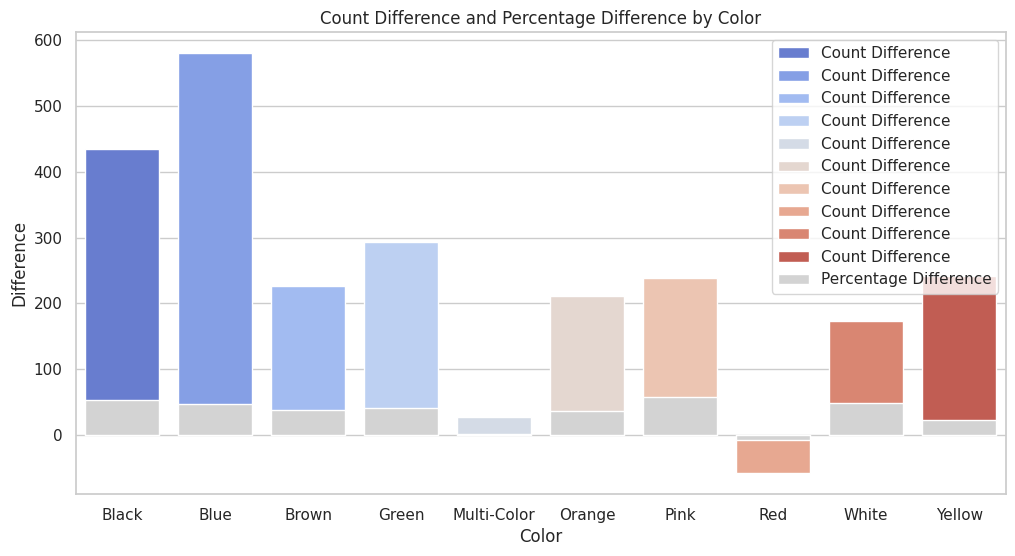

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'merged_counts'
sns.set(style="whitegrid")

# Create a bar plot for count_diff and percentage_diff by color
plt.figure(figsize=(12, 6))
sns.barplot(x='color', y='count_diff', data=merged_counts, palette='coolwarm', label='Count Difference')
sns.barplot(x='color', y='percentage_diff', data=merged_counts, color='lightgray', label='Percentage Difference')

plt.title('Count Difference and Percentage Difference by Color')
plt.xlabel('Color')
plt.ylabel('Difference')
plt.legend()
plt.show()


**Understanding Category**

In [114]:
top_category = df[df['success_indicator'] == 'top'].groupby('category').size().reset_index(name='count')
flop_category= df[df['success_indicator'] == 'flop'].groupby('category').size().reset_index(name='count')

In [136]:
merged_category = pd.merge(flop_category, top_category, on='category', suffixes=('_flop', '_top'))
merged_category['count_diff'] = merged_category['count_top'] - merged_category['count_flop']
merged_category['count_total'] = merged_category['count_top'] + merged_category['count_flop']
merged_category['percentage_diff'] = ((merged_category['count_top'] - merged_category['count_flop']) /(merged_category['count_top'] + merged_category['count_flop'])) * 100

merged_category

,category,count_flop,count_top,count_diff,count_total,percentage_diff
0,Blouse,363,883,520,1246,41.733547
1,Hoodie,258,481,223,739,30.175913
2,Polo-Shirt,817,729,-88,1546,-5.692109
3,Sweatshirt,453,907,454,1360,33.382353
4,T-Shirt,271,1188,917,1459,62.851268
5,Tunic,653,997,344,1650,20.848485


Blouse, Sweatshirt, and T-Shirt categories exhibit significant positive success trends.

Polo-Shirt shows a negative count difference, suggesting a decrease in success rates.

Focus on optimizing strategies for successful categories like Blouse and T-Shirt.

**Understanding Main Promotion**

In [161]:
main_top_promotion = df[df['success_indicator'] == 'top'].groupby('main_promotion').size().reset_index(name='count')
main_flop_promotion = df[df['success_indicator'] == 'flop'].groupby('main_promotion').size().reset_index(name='count')

In [162]:
merged_main_promotion = pd.merge(main_flop_promotion, main_top_promotion, on='main_promotion', suffixes=('_flop', '_top'))
merged_main_promotion['count_diff'] = merged_main_promotion['count_top'] - merged_main_promotion['count_flop']
merged_main_promotion['count_total'] = merged_main_promotion['count_top'] + merged_main_promotion['count_flop']
merged_main_promotion['percentage_diff'] = ((merged_main_promotion['count_top'] - merged_main_promotion['count_flop']) /(merged_main_promotion['count_top'] + merged_main_promotion['count_flop'])) * 100
merged_main_promotion

,main_promotion,count_flop,count_top,count_diff,count_total,percentage_diff
0,Catalog,953,1293,340,2246,15.138023
1,Category_Highlight,930,1502,572,2432,23.519737
2,Display_Ad_Campaign,335,974,639,1309,48.815890
3,Frontpage_Header,597,1416,819,2013,40.685544


Category_Highlight and Display_Ad_Campaign promotions show positive success trends.

Frontpage_Header exhibits a substantial positive success trend with the highest count difference and percentage difference.

Allocate resources strategically based on observed success rates, with a focus on optimizing Frontpage_Header or make use of Category_Highlight and Display_Ad_Campaign more for better reach.

**Understanding Ratings(Stars)**

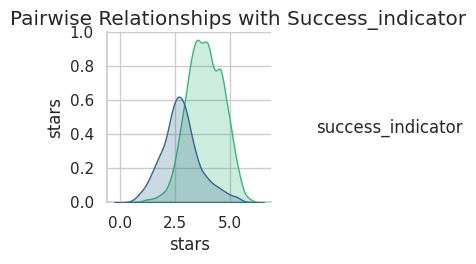

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'
sns.set(style="whitegrid")

# Select numerical columns for the pairplot and the categorical column
numerical_columns = ['stars']
categorical_column = 'success_indicator'

# Create a pair plot for the selected numerical columns, grouped by 'success_indicator'
sns.pairplot(df, hue=categorical_column, palette='viridis', vars=numerical_columns, diag_kind='kde', height=2.5)
plt.suptitle(f'Pairwise Relationships with {categorical_column.capitalize()}', y=1.02)
plt.show()


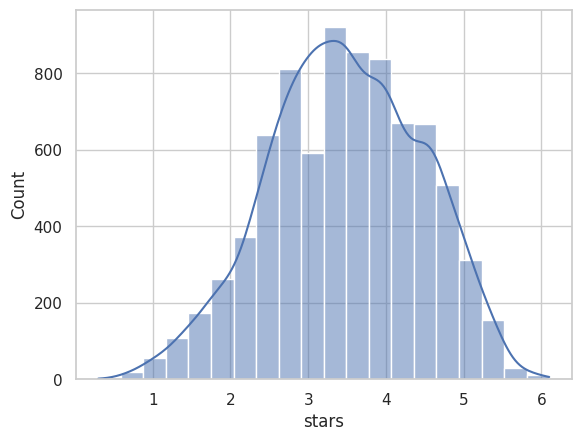

In [174]:
sns.histplot(df['stars'], bins=20, kde=True)
plt.show()

Having a rating less than 3 means the product is flop and anywhere greater than or equal to 3 has top so lets change the values to 0 for flop and 1 for top.

## Converting the Dataset

For artificial neural networks (ANNs), it's generally a good practice to encode categorical variables. ANNs often require numerical input, and encoding allows the network to learn patterns and relationships in the data more effectively.

In [179]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category'] = label_encoder.fit_transform(df['category'])

df['main_promotion'] = label_encoder.fit_transform(df['main_promotion'])

df['color'] = label_encoder.fit_transform(df['color'])

df['success_indicator'] = label_encoder.fit_transform(df['success_indicator'])


In [180]:
df.head()

,category,main_promotion,color,stars,success_indicator
0,5,0,3,0,0
1,1,1,7,0,0
2,3,0,7,0,1
3,2,1,1,0,0
4,1,1,3,0,1


**Oversampling or Undersampling due to imbalance in classes:**

Oversampling the minority class (in this case, '0') by generating synthetic samples.

Undersampling the majority class (in this case, '1') by removing some instances.

In [181]:
df['success_indicator'].value_counts()

1    5185
0    2815
Name: success_indicator, dtype: int64

SMOTE (Synthetic Minority Over-sampling Technique):

It creates synthetic samples for the minority class to balance the class distribution.

Addresses the issue of overfitting by generating synthetic examples rather than replicating existing ones.

In [182]:
from imblearn.over_sampling import SMOTE
x = df.drop('success_indicator', axis=1)
y = df['success_indicator']

In [183]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Resample the data
x_resampled, y_resampled = smote.fit_resample(x, y)

# Check the class distribution after resampling
print(Counter(y_resampled))

Counter({0: 5185, 1: 5185})


In [ ]:
df.balanced

###Training and Testing

**Artificial Neural Network (ANN):**

It's suitable for complex patterns and relationships in the data.
Can capture non-linearities in the features.
Keras or TensorFlow can be used to implement the ANN.

**Random Forest Classifier:**

Robust and handles non-linear relationships well.
Handles feature importance automatically.
Ensemble learning provides better generalization.

**Support Vector Machine (SVM):**

Effective in high-dimensional spaces.
Handles non-linear relationships using different kernel functions.
Good for binary classification tasks.

In [188]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'X' is your feature matrix (without 'item_no') and 'y' is the target variable
X = df.drop(['success_indicator'], axis=1)  # Assuming 'success_indicator' is the target variable
y = df['success_indicator']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Artificial Neural Network (ANN)
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
ann_model.fit(X_train, y_train)
y_pred_ann = ann_model.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
classification_report_ann = classification_report(y_test, y_pred_ann)

# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Model 3: Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

In [189]:

# Evaluate and compare models
print("ANN Model Evaluation:")
print(f"Accuracy: {accuracy_ann}")
print(f"Classification Report:\n{classification_report_ann}\n")

print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf}")
print(f"Classification Report:\n{classification_report_rf}\n")

print("SVM Model Evaluation:")
print(f"Accuracy: {accuracy_svm}")
print(f"Classification Report:\n{classification_report_svm}\n")

ANN Model Evaluation:
Accuracy: 0.75625
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.56      0.62       571
           1       0.78      0.86      0.82      1029

    accuracy                           0.76      1600
   macro avg       0.74      0.71      0.72      1600
weighted avg       0.75      0.76      0.75      1600


Random Forest Model Evaluation:
Accuracy: 0.81625
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       571
           1       0.84      0.89      0.86      1029

    accuracy                           0.82      1600
   macro avg       0.81      0.79      0.79      1600
weighted avg       0.81      0.82      0.81      1600


SVM Model Evaluation:
Accuracy: 0.643125
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       571
           1       0.64      1.00  

In [190]:
df.to_csv('encoded_data.csv', index=False)